In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
income = pd.read_csv('./dataset/Income1.csv')

In [3]:
income

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634
5,6,12.086957,26.398951
6,7,12.488294,17.435307
7,8,12.889632,25.507885
8,9,13.290970,36.884595
9,10,13.732441,39.666109


Text(0, 0.5, 'Income')

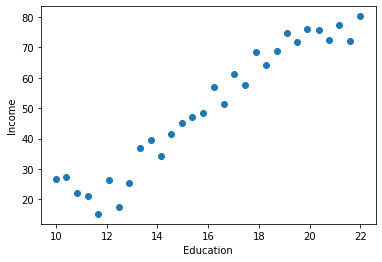

In [4]:
# 观察一下有没有线性关系
plt.scatter(income.Education, income.Income)
plt.xlabel('Education')
plt.ylabel('Income')

In [ ]:
# 第一步: 定义预测函数 y = wx + b
# 第二步:第一损失函数 1/2 * (y_true - y_pred)** 2
# 第三步: 使用梯度下降更新参数

In [49]:
# w在这里不能乘0.02 , 因为在pytorch中非叶子节点是不会自动求导的. 
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [50]:
w

tensor([-0.5656], requires_grad=True)

In [15]:
w.dtype

torch.float32

In [16]:
b.dtype

torch.float32

In [ ]:
# 从ndarray中快速生成tensor用torch.from_numpy(ndarray)

In [19]:
# 训练要求必须是二维
X = torch.from_numpy(income.Education.values.reshape(-1, 1)).type(torch.FloatTensor)

In [21]:
Y = torch.from_numpy(income.Income.values).type(torch.FloatTensor)

In [20]:
X.dtype

torch.float32

In [22]:
X.shape

torch.Size([30, 1])

In [ ]:
torch.matmul()

In [51]:
learning_rate = 0.0001

In [54]:
for epoch in range(10000):
    for x, y in zip(X, Y):
        y_pred = torch.matmul(x, w) + b
        
        # 损失函数
        loss = (y - y_pred).pow(2).sum()
        
        # pytorch对同一个变量多次求导, 会把求导的结果累加起来, 需要每次循环的时候, 把导数清零. 
        if w.grad is not None:
            # 重置w的导数
            w.grad.data.zero_()
            
        if b.grad is not None:
            b.grad.data.zero_()
            
        # 反向传播
        loss.backward()
        
        # 更新w,b
        # 更新的时候是不需要求导. 
        with torch.no_grad():
            w.data -= w.grad.data * learning_rate
            b.data -= b.grad.data * learning_rate
    if epoch % 100 == 0:
        y_ = torch.matmul(X, w) + b
        l = (Y - y_).pow(2).mean()
        print(w.data, b.data, l.data)

tensor([5.4691]) tensor([-37.5000]) tensor(30.0667)
tensor([5.4693]) tensor([-37.5039]) tensor(30.0661)
tensor([5.4695]) tensor([-37.5076]) tensor(30.0656)
tensor([5.4697]) tensor([-37.5106]) tensor(30.0651)
tensor([5.4698]) tensor([-37.5137]) tensor(30.0647)
tensor([5.4700]) tensor([-37.5167]) tensor(30.0643)
tensor([5.4702]) tensor([-37.5200]) tensor(30.0638)
tensor([5.4703]) tensor([-37.5230]) tensor(30.0634)
tensor([5.4705]) tensor([-37.5261]) tensor(30.0630)
tensor([5.4707]) tensor([-37.5291]) tensor(30.0625)
tensor([5.4708]) tensor([-37.5318]) tensor(30.0622)
tensor([5.4709]) tensor([-37.5344]) tensor(30.0618)
tensor([5.4711]) tensor([-37.5372]) tensor(30.0614)
tensor([5.4712]) tensor([-37.5399]) tensor(30.0610)
tensor([5.4714]) tensor([-37.5426]) tensor(30.0606)
tensor([5.4716]) tensor([-37.5459]) tensor(30.0602)
tensor([5.4717]) tensor([-37.5490]) tensor(30.0597)
tensor([5.4719]) tensor([-37.5524]) tensor(30.0593)
tensor([5.4721]) tensor([-37.5555]) tensor(30.0588)
tensor([5.47

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
# 一个tensor可以通过.numpy获取它的ndarray形式. 
X.numpy()

array([[10.      ],
       [10.401338],
       [10.84281 ],
       [11.244147],
       [11.645485],
       [12.086957],
       [12.488295],
       [12.889632],
       [13.29097 ],
       [13.732442],
       [14.13378 ],
       [14.535117],
       [14.976588],
       [15.377927],
       [15.779264],
       [16.220736],
       [16.622074],
       [17.02341 ],
       [17.464884],
       [17.86622 ],
       [18.26756 ],
       [18.70903 ],
       [19.110369],
       [19.511705],
       [19.913044],
       [20.354515],
       [20.755854],
       [21.15719 ],
       [21.598661],
       [22.      ]], dtype=float32)

In [44]:
linear = LinearRegression()
linear.fit(X.numpy(), Y.numpy())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
linear.coef_

array([5.599482], dtype=float32)

In [46]:
w.data

tensor([5.1266])

In [47]:
linear.intercept_

-39.44625

In [48]:
b.data

tensor([-32.6958])

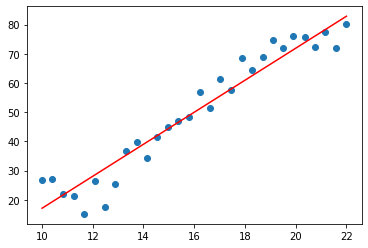

In [55]:
plt.scatter(income.Education, income.Income)
plt.plot(X.numpy(), (torch.matmul(X, w) + b).data.numpy(), c='r')

### 简洁写法

In [ ]:
# 简洁写法就是使用pytorch封装的api来写. 

In [56]:
from torch import nn

In [57]:
# pytorch中的全连接, 或者说神经网络, 或者说线性运算, 
model = nn.Linear(1, 1)

In [58]:
# mse
loss_fn = nn.MSELoss()

In [59]:
# 模型要更新的参数 放在parameters中.
model.parameters()

<generator object Module.parameters at 0x0000019C00E1C948>

In [60]:
# 优化器
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [61]:
# 训练
for epoch in range(10000):
    for x, y in zip(X, Y):
        y_pred = model(x)
        loss = loss_fn(y, y_pred)
        # 梯度清零
        optimizer.zero_grad()
        loss.backward()
        # 更新参数
        optimizer.step()

D:\.venv\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [62]:
model.weight

Parameter containing:
tensor([[5.1309]], requires_grad=True)

In [63]:
model.bias

Parameter containing:
tensor([-32.7909], requires_grad=True)